<a href="https://colab.research.google.com/github/sandhyagithubdasari/sample_eda_template_project/blob/main/THE_SPARK_FOUNDATION_TASK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRIP : THE SPARKS FOUNDATION





**Data Science and Business Analytics Intern**

**Author :  Sandhya Dasari**


**TASK 1 : Prediction Using Supervised ML**

In these regression task we have to predict percentage of student based on number of study hours
this is simple linear regression task as it involves just 2 variables

In [18]:
#Import Liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#Dataset
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

**Exploring Data**

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


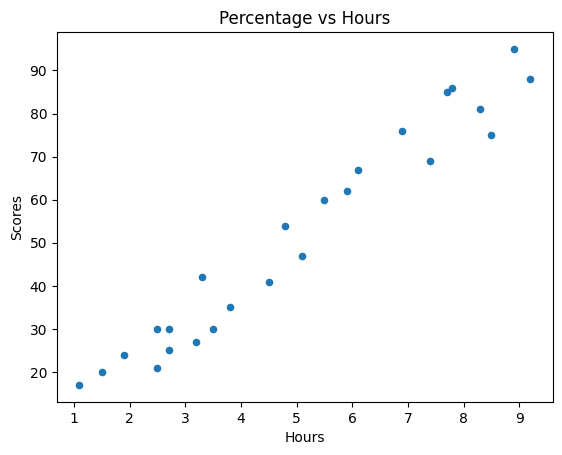

In [6]:
data.plot(kind = 'scatter',x= 'Hours',y= 'Scores')
plt.title("Percentage vs Hours")
plt.show()

**Linear Regression**

In [7]:
x = data.iloc[:, 0:-1].values
y = data.iloc[:, 1].values

In [ ]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [8]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state= 40)

In [10]:

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

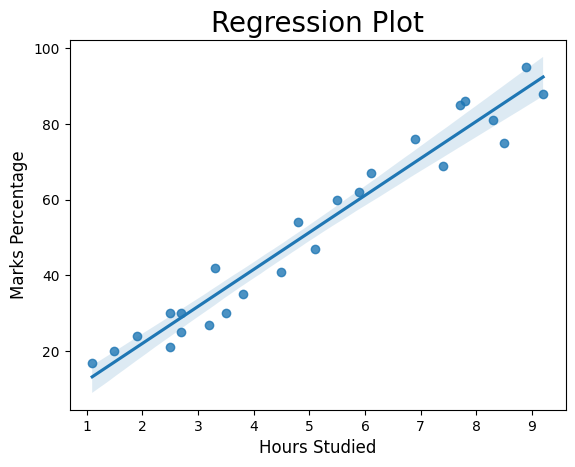

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [11]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

In [12]:

y_pred = reg.predict(x_test)

In [13]:

actual_predicted = pd.DataFrame({'Target':y_test,'Predicted':y_pred})
actual_predicted

,Target,Predicted
0,95,90.279155
1,86,79.236617
2,17,11.977522
3,69,75.221148
4,42,34.062598
5,75,86.263686
6,54,49.120604
7,27,33.058731


<ipython-input-14-956bf8018746>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.array(y_test-y_pred))


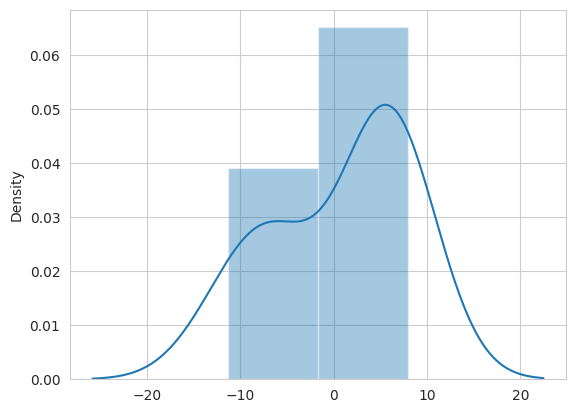

In [14]:
sns.set_style('whitegrid')
sns.distplot(np.array(y_test-y_pred))
plt.show()

**what would be the predicted score if a student studies for 9.25 hours/day?**

In [15]:

h=9.25
s=reg.predict([[h]])
print("If a student studies for {} hours per day he/she will score {}% in exams.".format(h,s))

If a student studies for 9.25 hours per day he/she will score [93.79268943]% in exams.



According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.79 marks

**MODEL EVALUATION**

In [16]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))

Mean Absolute Error: 6.608383730582239
R2 Score: 0.930188764896189
